## Step-1: Importing the data

### Importing the necessary libriraries to read the data

In [1]:
import numpy as np,pandas as pd
import seaborn as sns,matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.shape

(200000, 9)

In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df.size

1800000

## Step-2:Inspecting the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


### Checking the Null Values

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(inplace=True)

### Re-Checking the Null Values

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Step-3: Data Handing and Preprocessing

### Precprocessing the Pickup time

In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [11]:
df['time'] = df['pickup_datetime'].dt.time

In [12]:
def categorize_day(time):
    if time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    else:
        return 'Evening'

In [13]:
df['Categorize_day'] = df['time'].apply(categorize_day)

In [14]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,Categorize_day
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19:52:06,Evening
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20:04:56,Evening
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21:45:00,Evening
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,08:22:21,Morning
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17:47:00,Evening


In [15]:
df=df.drop(['pickup_datetime','time','key','passenger_count'],axis=1)

In [16]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Categorize_day
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,Evening
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,Evening
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,Evening
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,Morning
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,Evening


### EDA Analysis of the Dataset

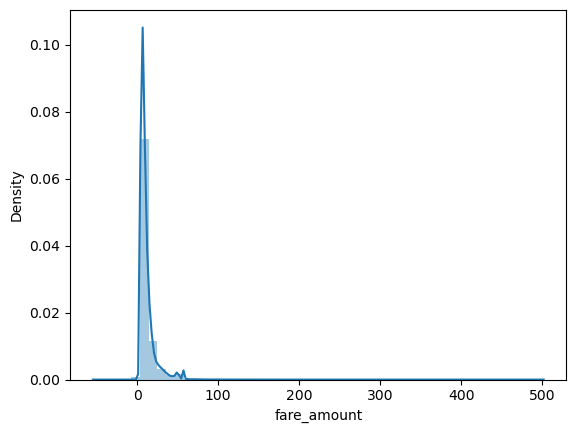

In [17]:
sns.distplot(df['fare_amount']);

<Axes: xlabel='pickup_latitude', ylabel='Density'>

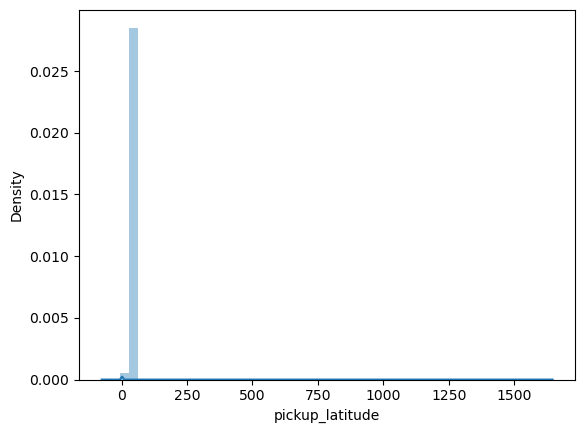

In [18]:
sns.distplot(df['pickup_latitude'])

<Axes: xlabel='pickup_longitude', ylabel='Density'>

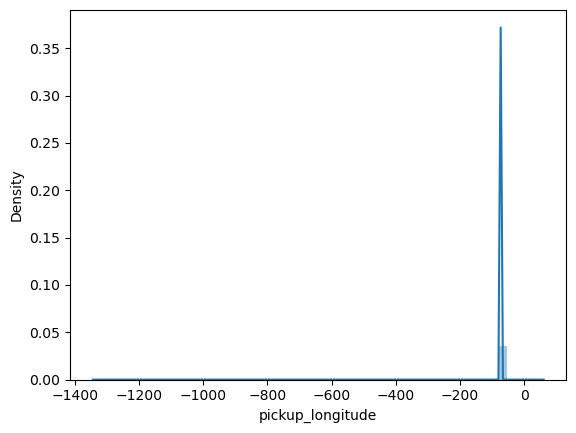

In [19]:
sns.distplot(df['pickup_longitude'])

In [20]:
df.describe()

print("drop_off latitude min value",df["dropoff_latitude"].min())
print("drop_off latitude max value",df["dropoff_latitude"].max())
print("drop_off longitude min value",df["dropoff_longitude"].min())
print("drop_off longitude max value",df["dropoff_longitude"].max())
print("pickup latitude min value",df["pickup_latitude"].min())
print("pickup latitude max value",df["pickup_latitude"].max())
print("pickup longitude min value",df["pickup_longitude"].min())
print("pickup longitude max value",df["pickup_longitude"].max())

drop_off latitude min value -881.9855130000001
drop_off latitude max value 872.6976279999999
drop_off longitude min value -3356.6663
drop_off longitude max value 1153.5726029999998
pickup latitude min value -74.01551500000001
pickup latitude max value 1644.421482
pickup longitude min value -1340.64841
pickup longitude max value 57.418457


In [21]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Categorize_day
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,Evening
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,Evening
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,Evening
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,Morning
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,Evening


In [22]:
df[df['fare_amount']<0]

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Categorize_day
63395,30260042,-5.00,-73.992249,40.748936,-73.988518,40.748180,Evening
71246,51325304,-3.30,-73.952725,40.768235,-73.949928,40.772208,Evening
79903,50284253,-3.50,-73.982430,40.775024,-73.981750,40.778439,Afternoon
89322,26673143,-49.57,-73.972772,40.785657,-73.972867,40.785500,Morning
92063,10267585,-23.70,-73.952740,40.768233,-74.007028,40.707338,Morning
98875,51135168,-52.00,-74.000359,40.728729,-74.005699,40.728680,Evening
104080,21688700,-7.30,-73.952623,40.766942,-73.953787,40.784882,Evening
111589,13971251,-52.00,-73.984665,40.759026,0.000000,0.000000,Evening
139272,40714150,-6.90,-73.988727,40.736445,-73.977622,40.750487,Evening
148803,34933571,-5.70,-73.977300,40.742783,-73.988837,40.747465,Morning


In [23]:
df=df[df['fare_amount']>0]

In [24]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.999770e+05,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000
mean,2.771227e+07,11.362586,-72.527844,39.935995,-72.526243,39.924410
std,1.601403e+07,9.897063,11.437285,7.720462,13.115114,6.793438
min,1.000000e+00,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513
25%,1.382515e+07,6.000000,-73.992065,40.734795,-73.991407,40.733825
50%,2.774512e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042
75%,4.155544e+07,12.500000,-73.967155,40.767158,-73.963659,40.768001
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628


In [25]:
df.shape

(199977, 7)

In [26]:
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km

In [27]:
df['Distance_km'] = haversine_distance(df['pickup_latitude'],df['pickup_longitude'],
                                      df['dropoff_latitude'],df['dropoff_longitude'])

In [28]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Categorize_day,Distance_km
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,Evening,1.683323
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,Evening,2.457590
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,Evening,5.036377
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,Morning,1.661683
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,Evening,4.475450


### Treatment Of Outliers in the Dataset

In [29]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance_km
count,1.999770e+05,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000
mean,2.771227e+07,11.362586,-72.527844,39.935995,-72.526243,39.924410,20.770717
std,1.601403e+07,9.897063,11.437285,7.720462,13.115114,6.793438,382.008526
min,1.000000e+00,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382515e+07,6.000000,-73.992065,40.734795,-73.991407,40.733825,1.215372
50%,2.774512e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,2.121109
75%,4.155544e+07,12.500000,-73.967155,40.767158,-73.963659,40.768001,3.875211
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,16409.239135


In [30]:
q1= df['fare_amount'].quantile(0.25)
q1

6.0

In [31]:
q3 =df['fare_amount'].quantile(0.75)
q3

12.5

In [32]:
IQR = q3-q1

In [33]:
lower_bound = q1-1.5*q3

In [34]:
upper_bound =q1+1.5*q3

In [35]:
print(lower_bound,upper_bound)

-12.75 24.75


In [36]:
df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

In [37]:
q1= df['Distance_km'].quantile(0.25)
q1

1.171528985955548

In [38]:
q3 =df['Distance_km'].quantile(0.75)
q3

3.3610906129406533

In [39]:
IQR = q3-q1

In [40]:
lower_bound = q1-1.5*q3

In [41]:
upper_bound =q1+1.5*q3

In [42]:
print(lower_bound,upper_bound)

-3.870106933455432 6.213164905366527


In [43]:
df = df[(df['Distance_km'] >= lower_bound) & (df['Distance_km'] <= upper_bound)]

In [44]:
df.shape

(173788, 8)

In [45]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Categorize_day,Distance_km
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,Evening,1.683323
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,Evening,2.457590
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,Evening,5.036377
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,Morning,1.661683
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,Evening,4.475450


<Axes: xlabel='Distance_km', ylabel='fare_amount'>

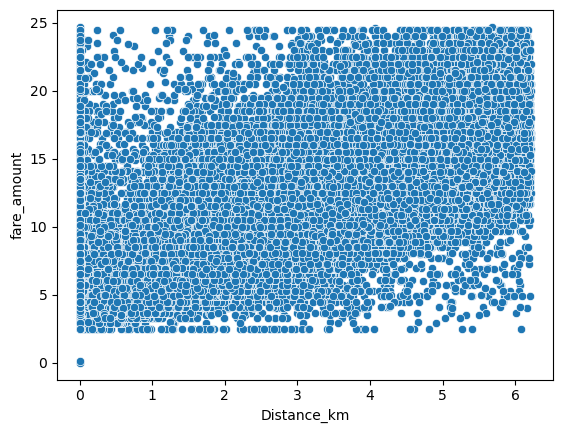

In [46]:
sns.scatterplot(x='Distance_km',y='fare_amount',data=df)

In [47]:
filtered_df = df[(df['fare_amount'] != 0) & (df['Distance_km'] == 0)]
indices_to_remove = filtered_df.index
df = df.drop(indices_to_remove)

In [48]:
def categorize_distance(distance_km, short_threshold, medium_threshold):
    """
    Categorize the distance into short, medium, and long based on provided thresholds
    """
    if distance_km <= short_threshold:
        return 'Short'
    elif distance_km <= medium_threshold:
        return 'Medium'
    else:
        return 'Long'

In [49]:
short_threshold = 5  # example threshold for short distance in kilometers
medium_threshold = 20  # example threshold for medium distance in kilometers

# Apply categorization function to create a new column for distance categories
df['distance_category'] = df['Distance_km'].apply(
    lambda x: categorize_distance(x, short_threshold, medium_threshold))

In [50]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Categorize_day,Distance_km,distance_category
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,Evening,1.683323,Short
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,Evening,2.457590,Short
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,Evening,5.036377,Medium
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,Morning,1.661683,Short
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,Evening,4.475450,Short


### Step-5: Creating Dummy variable

In [51]:
dummies = pd.get_dummies(df[['Categorize_day','distance_category']]).astype(int)
dummies.head()

,Categorize_day_Afternoon,Categorize_day_Evening,Categorize_day_Morning,distance_category_Medium,distance_category_Short
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,1,0
3,0,0,1,0,1
4,0,1,0,0,1


In [52]:
df=df.drop(['Categorize_day','distance_category'],axis=1)

In [53]:
df = pd.concat([df,dummies],axis=1)

In [54]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance_km,Categorize_day_Afternoon,Categorize_day_Evening,Categorize_day_Morning,distance_category_Medium,distance_category_Short
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1.683323,0,1,0,0,1
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,2.457590,0,1,0,0,1
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,5.036377,0,1,0,1,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,1.661683,0,0,1,0,1
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,4.475450,0,1,0,0,1


In [55]:
df=df.drop('Categorize_day_Afternoon',axis=1)

In [56]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance_km,Categorize_day_Evening,Categorize_day_Morning,distance_category_Medium,distance_category_Short
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1.683323,1,0,0,1
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,2.457590,1,0,0,1
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,5.036377,1,0,1,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,1.661683,0,1,0,1
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,4.475450,1,0,0,1


### Step-6: Spliting the Data into train and  Test set

In [57]:
X=df.drop(['Unnamed: 0','fare_amount'],axis=1)
y= df['fare_amount']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [60]:
X_train.shape

(134876, 9)

In [61]:
y_train.shape

(134876,)

### Step-7: Data Scalling

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
num_vars=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Distance_km']

In [65]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [66]:
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance_km,Categorize_day_Evening,Categorize_day_Morning,distance_category_Medium,distance_category_Short
55816,0.012326,0.964279,0.012277,0.964235,0.133992,1,0,0,1
47078,0.012170,0.964042,0.012100,0.964105,0.146594,0,0,0,1
88219,0.011984,0.964161,0.012072,0.964293,0.416856,0,1,0,1
80490,0.011895,0.963835,0.011990,0.963709,0.420289,1,0,0,1
73416,0.012281,0.964250,0.012034,0.964105,0.378311,0,0,0,1


In [67]:
y_train_reshaped = y_train.values.reshape(-1,1)

In [68]:
y_train = scaler.fit_transform(y_train_reshaped)

In [69]:
y_train = pd.Series(y_train.flatten())

In [70]:
y_train.head()

0    0.202352
1    0.214517
2    0.360503
3    0.445661
4    0.246959
dtype: float64

### Step-8: Correlation Analysis

In [71]:
data_corr = df.drop('Unnamed: 0',axis=1)

<Axes: >

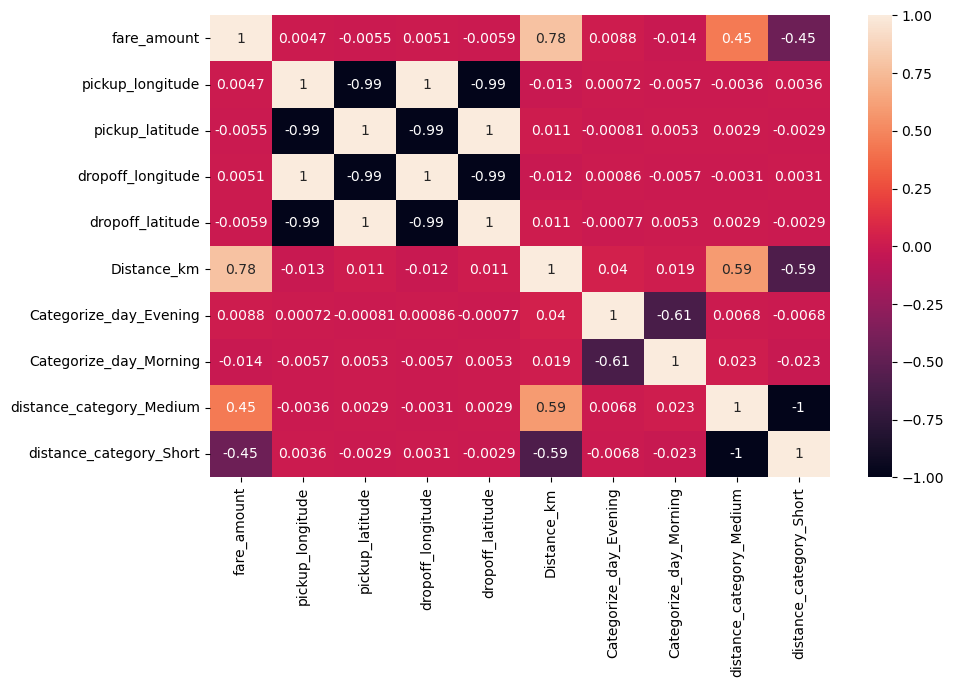

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_corr.corr(),annot=True)

### Step- 9: Evaluating the model

In [73]:
import statsmodels.api as sm

In [74]:
X_train_sm = sm.add_constant(X_train['Distance_km'])

In [75]:
X_train_sm.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Fitting the OLS model
lr = sm.OLS(y_train, X_train_sm)
result = lr.fit()

# Print summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 2.128e+05
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        08:22:12   Log-Likelihood:             1.2631e+05
No. Observations:              134876   AIC:                        -2.526e+05
Df Residuals:                  134874   BIC:                        -2.526e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1520      0.000    307.572      

In [76]:
result.params

const          0.151953
Distance_km    0.534851
dtype: float64

In [77]:
y_train_pred = result.predict(X_train_sm)

In [78]:
residual = y_train - y_train_pred

<Axes: ylabel='Density'>

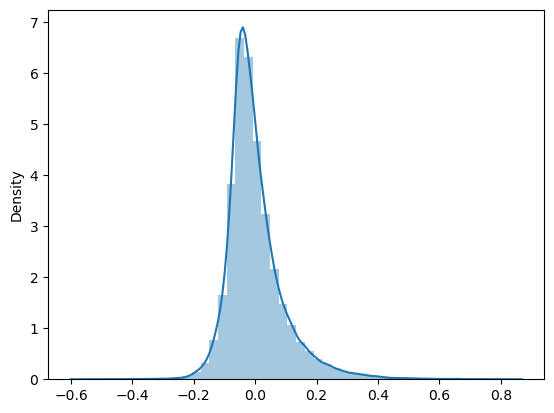

In [79]:
sns.distplot(residual)

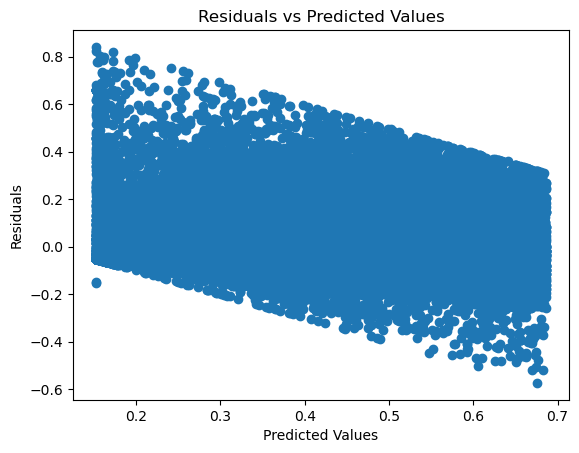

In [80]:
plt.scatter(y_train_pred, residual)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


## Step-10: Prediction on Test Set

In [86]:
X_test_sm = sm.add_constant(X_test['Distance_km'])

In [87]:
y_test_pred = result.predict(X_test_sm)

In [88]:
y_test_pred

41482     0.418973
163644    1.523495
156925    0.680839
153420    1.126367
114047    2.696633
            ...   
129595    1.363668
82898     2.586490
119528    2.365399
138133    2.796756
49564     0.622057
Length: 33720, dtype: float64

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [91]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

7.862423565342503

In [92]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

-3.37564903179395